In [10]:
import pandas as pd

# Read the orders, products, and category translation CSV files into DataFrames
orders = pd.read_csv('olist_order_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

# Merge product data with category translation
products = products.merge(category_translation, on='product_category_name', how='left')

# Assuming you have a column like 'product_id' in the 'order_items' DataFrame
order_items = pd.read_csv('olist_order_items_dataset.csv')  # Replace 'order_items_dataset.csv' with the actual filename
order_items_products = order_items.merge(products, on='product_id', how='left')

# Calculate the number of sales for each product
product_sales_counts = order_items_products['product_id'].value_counts()

# Sort the products based on sales quantity in descending order
sorted_products = product_sales_counts.reset_index().rename(columns={'index': 'product_id', 'product_id': 'sales_quantity'}).sort_values(by='sales_quantity', ascending=False)

# Get the top 10 popular products
top_10_popular_products = sorted_products.head(10)

# Get category names in English for the top 10 popular products
top_10_popular_products_category = products[products['product_id'].isin(top_10_popular_products['product_id'])]
top_10_popular_products_category = top_10_popular_products_category[['product_id', 'product_category_name_english']]

# Change the format of the category names
top_10_popular_products_category['product_category_name_english'] = top_10_popular_products_category['product_category_name_english'].str.title()
top_10_popular_products_category['product_category_name_english'] = top_10_popular_products_category['product_category_name_english'].str.replace('_', ' & ').str.title()

# Print the result with sales quantity and the formatted category name
print("Top 10 Popular Products and Their Categories (in English) Sorted by Sales Quantity:")
for product_id, category_name, sales_quantity in zip(top_10_popular_products_category['product_id'], top_10_popular_products_category['product_category_name_english'], top_10_popular_products['sales_quantity']):
    print(f"Product ID: {product_id}, Category: {category_name}, Sales Quantity: {sales_quantity}")

Top 10 Popular Products and Their Categories (in English) Sorted by Sales Quantity:
Product ID: 53b36df67ebb7c41585e8d54d6772e08, Category: Watches & Gifts, Sales Quantity: 527
Product ID: 154e7e31ebfa092203795c972e5804a6, Category: Health & Beauty, Sales Quantity: 488
Product ID: 368c6c730842d78016ad823897a372db, Category: Garden & Tools, Sales Quantity: 484
Product ID: d1c427060a0f73f6b889a5c7c61f2ac4, Category: Computers & Accessories, Sales Quantity: 392
Product ID: 99a4788cb24856965c36a24e339b6058, Category: Bed & Bath & Table, Sales Quantity: 388
Product ID: aca2eb7d00ea1a7b8ebd4e68314663af, Category: Furniture & Decor, Sales Quantity: 373
Product ID: 422879e10f46682990de24d770e7f83d, Category: Garden & Tools, Sales Quantity: 343
Product ID: 3dd2a17168ec895c781a9191c1e95ad7, Category: Computers & Accessories, Sales Quantity: 323
Product ID: 389d119b48cf3043d311335e499d9c6b, Category: Garden & Tools, Sales Quantity: 281
Product ID: 53759a2ecddad2bb87a079a1f1519f73, Category: Garde

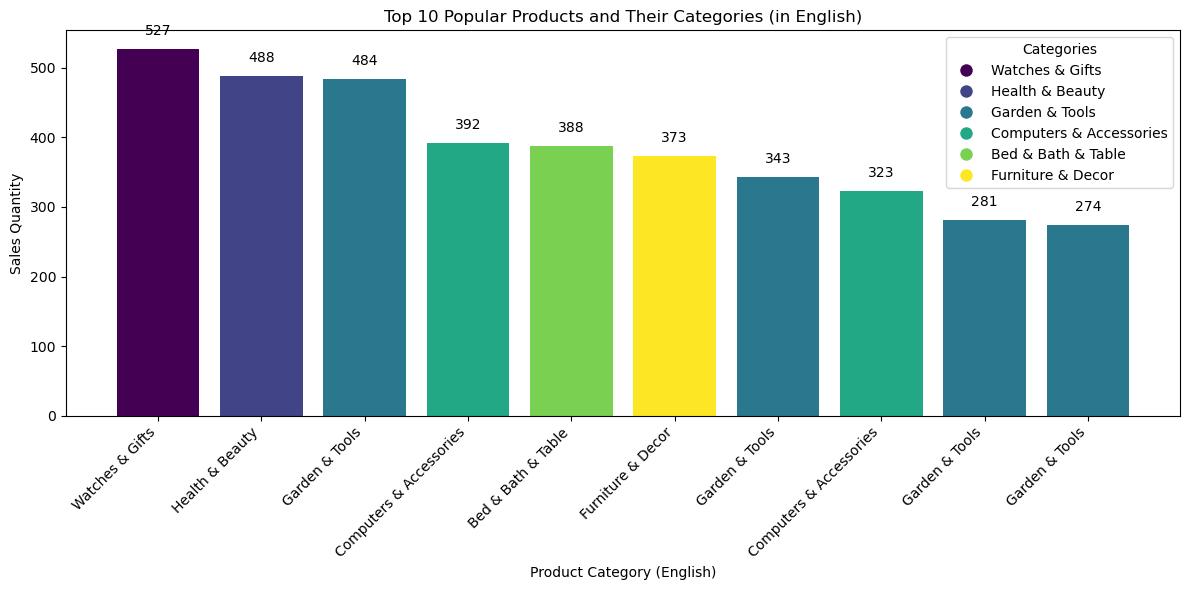

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert the NumPy array to a pandas Series
top_10_popular_products_series = pd.Series(top_10_popular_products['sales_quantity'])

# Create a dictionary to map product_id and category to unique colors
color_mapping = {}
unique_categories = top_10_popular_products_category['product_category_name_english'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))  # You can choose a different colormap if desired

for i, category in enumerate(unique_categories):
    color_mapping[category] = colors[i]

# Create a list of colors corresponding to each product
bar_colors = [color_mapping[category] for category in top_10_popular_products_category['product_category_name_english']]

# Create a bar chart for visualizing sales quantity with custom colors
plt.figure(figsize=(12, 6))  # Set the figure size to make it wider
bars = plt.bar(range(len(top_10_popular_products_series)), top_10_popular_products_series, tick_label=top_10_popular_products_category['product_category_name_english'], color=bar_colors)
plt.xlabel('Product Category (English)')
plt.ylabel('Sales Quantity')
plt.title('Top 10 Popular Products and Their Categories (in English)')
plt.xticks(rotation=45, ha='right')

# Add labels on top of each bar
for i, quantity in enumerate(top_10_popular_products_series):
    plt.text(i, quantity + 20, str(quantity), ha='center', color='black')

# Create a legend based on the color mapping
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=category, markersize=10, markerfacecolor=color_mapping[category]) for category in unique_categories]
plt.legend(handles=legend_handles, title='Categories', loc='upper right')

plt.tight_layout()

# Save the plot to a file
plt.savefig('sales_quantity_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()